In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('autos.csv', encoding='Latin-1')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [4]:
unw_col = ['dateCrawled', 'name', 'dateCreated', 'nrOfPictures', 'postalCode', 'lastSeen']
df = df.drop(columns=unw_col, axis=1)

In [5]:
df = df[
    (df['yearOfRegistration'] <= 2018)
    & (df['yearOfRegistration'] >= 1950)
    & (df['price'] <= 150000)
    & (df['price'] >= 100)
    & (df['powerPS'] <= 500)
    & (df['powerPS'] >= 10)]
df['age'] = (2018-df['yearOfRegistration']+df['monthOfRegistration']/12)
df['age'] = round(df['age'],2)
df = df.drop(columns=['yearOfRegistration', 'monthOfRegistration'], axis=1)
df = df.dropna(axis=0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247088 entries, 3 to 371527
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   seller             247088 non-null  object 
 1   offerType          247088 non-null  object 
 2   price              247088 non-null  int64  
 3   abtest             247088 non-null  object 
 4   vehicleType        247088 non-null  object 
 5   gearbox            247088 non-null  object 
 6   powerPS            247088 non-null  int64  
 7   model              247088 non-null  object 
 8   kilometer          247088 non-null  int64  
 9   fuelType           247088 non-null  object 
 10  brand              247088 non-null  object 
 11  notRepairedDamage  247088 non-null  object 
 12  age                247088 non-null  float64
dtypes: float64(1), int64(3), object(9)
memory usage: 26.4+ MB


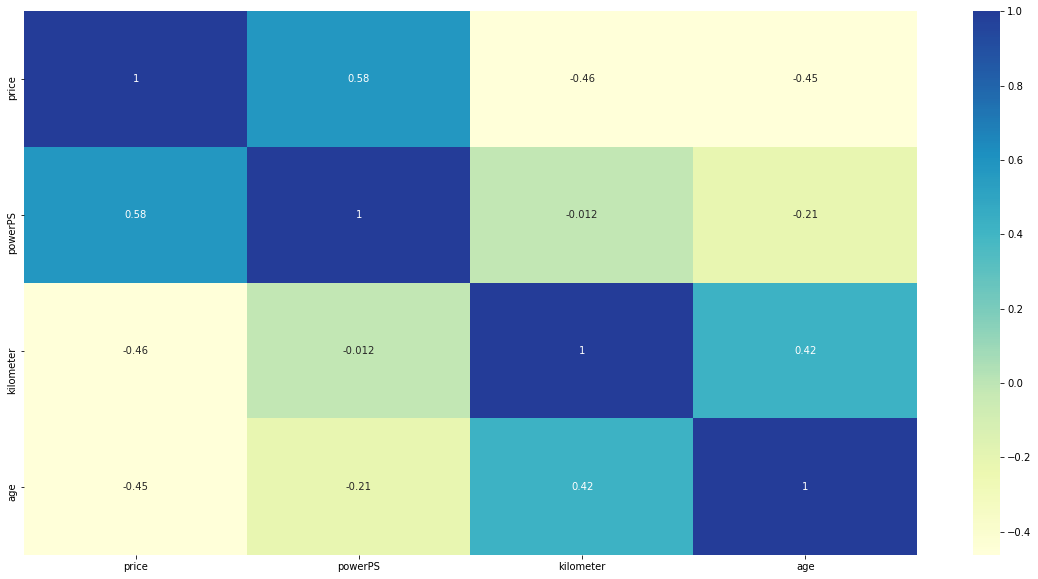

In [7]:
# The data consists of 4 numeric type attributes and 9 categorical type attributes
# Let's visualize the numeric type objects using heatmaps
f, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu', center=0.4)

In [8]:
# Let's analyze the categorical type object
df.describe(include='object')

,seller,offerType,abtest,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage
count,247088,247088,247088,247088,247088,247088,247088,247088,247088
unique,2,2,2,8,2,250,7,39,2
top,privat,Angebot,test,limousine,manuell,golf,benzin,volkswagen,nein
freq,247086,247087,128262,72789,189107,20087,158902,51679,222768


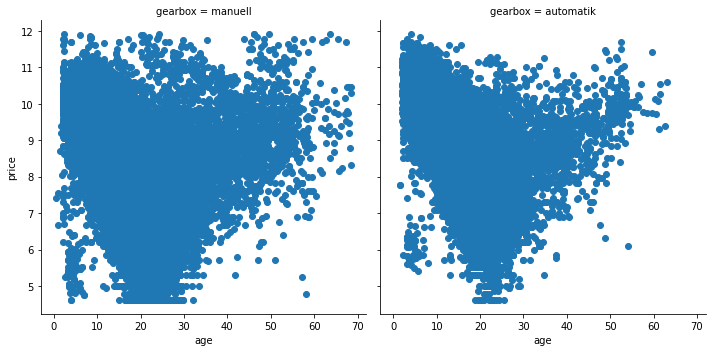

In [9]:
# Let's produce facet grid of relationship between age and price of car for different gearbox type
df['price'] = np.log(df['price'])
fg = sns.FacetGrid(df, col = 'gearbox', height=5, aspect=1)
fg.map(plt.scatter, 'age', 'price')

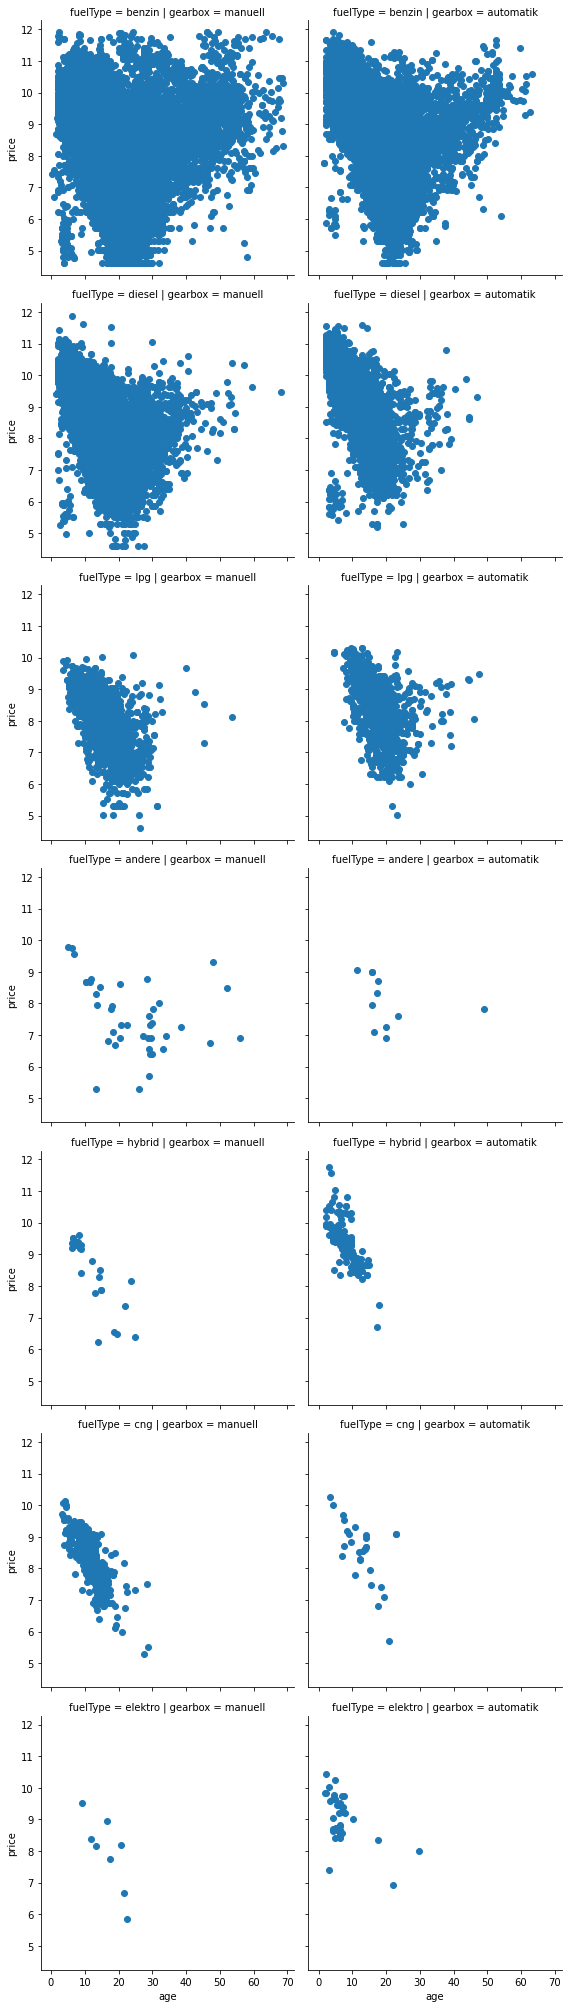

In [10]:
# Let's produce facet grid of relationship between age and price of car for different gearbox type and different fuel type
fg2 = sns.FacetGrid(df, col='gearbox', row='fuelType', height=4, aspect=1)
fg2.map(plt.scatter, 'age', 'price')

In [11]:
# Let's produce facet grid of count of vehicle type for different gearbox type and different fuel type
df.vehicleType.value_counts()

limousine     72789
kleinwagen    54902
kombi         50858
bus           23806
cabrio        17902
coupe         13766
suv           11570
andere         1495
Name: vehicleType, dtype: int64

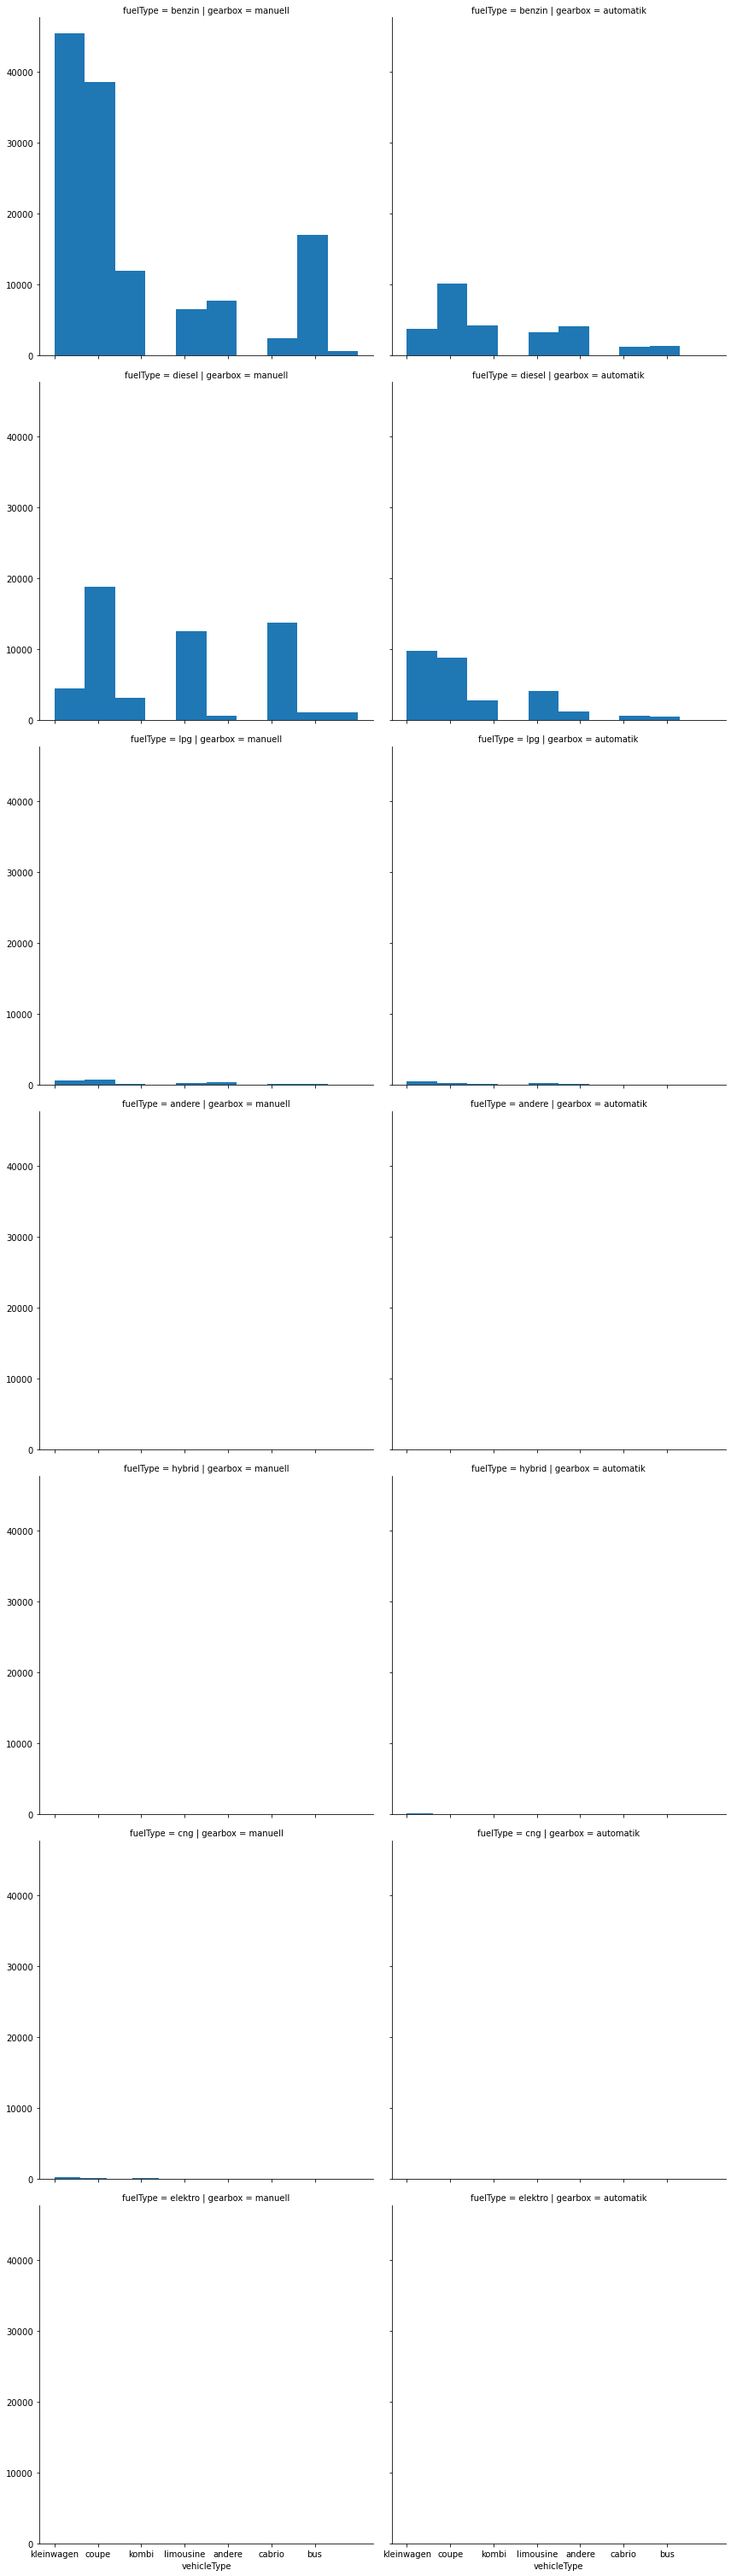

In [12]:
fg2 = sns.FacetGrid(df, col='gearbox', row='fuelType', height=6, aspect=1)
fg2.map(plt.hist, 'vehicleType')

In [13]:
def ecdf(series, figsize=(3,3)):
    a = series.value_counts()
    a = pd.DataFrame(a)
    a= a/a.sum()
    a = a.sort_index()
    a.reset_index(inplace=True)
    a['cdf'] = 0
    for i, row in a.iterrows():
        if i == 0:
            a.loc[i, 'cdf']=a.iloc[i,1]
        else:
            a.loc[i,'cdf']=a.loc[i-1,'cdf'] + a.iloc[i, 1]
    a.plot(kind='scatter', x='index', y='cdf', figsize=figsize)
    plt.xlabel(a.columns[1])
    plt.show()

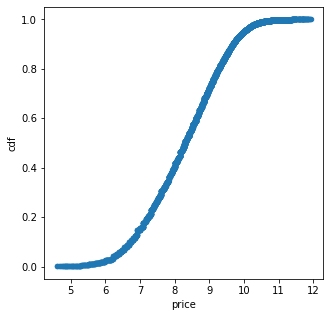

In [14]:
# Let's plot the ecdf plot of price
ecdf(df['price'], figsize=(5,5))

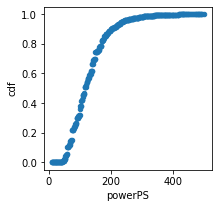

In [15]:
# Let's plot the ecdf plot of powerPS
ecdf(df['powerPS'])

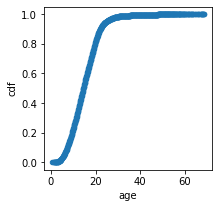

In [16]:
# Let's plot the ecdf plot of age
ecdf(df['age'])